In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Celerates MSIB/Tugas Akhir Celerates/data_bersih (1).csv')

In [ ]:
df.shape

(394, 2)

In [ ]:
df.head(10)

,text,sentiment
0,great day look like dream,positive
1,feel sorri miss sea beach,positive
2,dont angri,negative
3,attend class listen teacher read slide nonsenc,negative
4,want go let go,negative
5,night feel neutral,neutral
6,feed babi fun smile coo,positive
7,soooo high,neutral
8,NaN,neutral
9,today first time arriv boat amaz journey,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       392 non-null    object
 1   sentiment  394 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [ ]:
df.isnull().sum()

,0
text,2
sentiment,0


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
neutral,153
positive,132
negative,109


In [ ]:
# Memisahkan kolom teks dan sentimen
x = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [ ]:
# Convert NaN values to empty strings in 'x'
x = ["" if pd.isnull(value) else value for value in x]

In [ ]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Tampilkan ukuran data hasil split
print("Ukuran data setelah split:")
print(f"x_train: {len(x_train)}, x_test: {len(x_test)}")

Ukuran data setelah split:
x_train: 275, x_test: 119


In [ ]:
cv = CountVectorizer()

In [ ]:
# Inisialisasi Random Forest sebagai classifier
classifier = SVC()
vectorizer = CountVectorizer()

# Membuat pipeline dengan TfidfVectorizer dan Random Forest
model = Pipeline([('vectorizer', vectorizer), ('classifier', classifier)])

# Melatih model
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('classifier', SVC())])

In [ ]:
# evaluation
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.67      0.18      0.29        33
     neutral       0.40      0.98      0.57        41
    positive       0.90      0.20      0.33        45

    accuracy                           0.46       119
   macro avg       0.66      0.45      0.39       119
weighted avg       0.66      0.46      0.40       119



In [ ]:
A=confusion_matrix(y_test,y_pred)
print(A)

[[ 6 27  0]
 [ 0 40  1]
 [ 3 33  9]]


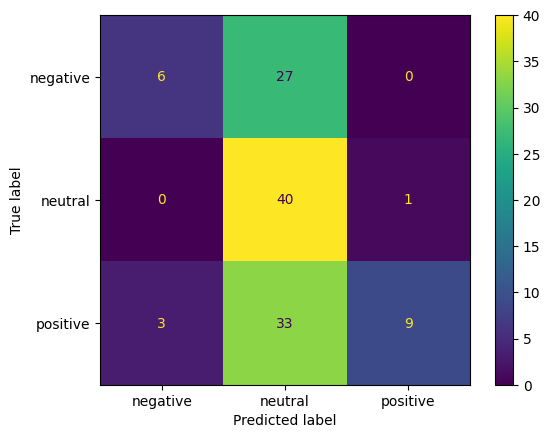

In [ ]:
#Visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# f1 score
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.3076923076923077
